
# Understanding The Indicators Of High Traffic On I-94 Highway


## Introduction


In this project, we will analyse a dataset about the westbound traffic on the  [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94), an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.

The dataset for this analysis is made available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

## Goal Of Analysis

The aim of this analysis is to get insightfull information with regards to the indicators of heavy traffic on I-94. Some of these indicators can be:

- Weather type
- Time of the day
- Time of the week and much more

### Information about columns




| holiday | Categorical US National holidays plus regional holiday |
| :-------------- |  :---------------- | 
| temp | Numeric Average temp in kelvin |
| rain_1h| Numeric Amount in mm of rain that occurred in the hour |
| snow_1h | Numeric Amount in mm of snow that occurred in the hour |
| clouds_all | Numeric Percentage of cloud cover |
| weather_main | Categorical Short textual description of the current weather |
| weather_description| Categorical Longer textual description of the current weather |
| date_time | DateTime Hour of the data collected in local CST time |
| traffic_volume | Numeric Hourly I-94 ATR 301 reported westbound traffic volume |


In [107]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the dataset
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [108]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [109]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Description of Dataset

The dataset contains a total of 48204 rows and 9 columns. The columns include both numerical and string values. There is no column or datapoint with a null or empty value. 

Each entry contains data about traffic for a particular hour. The data was recorded after every 1hour from **2012-10-02 09:00:00** to **2018-09-30 23:00:00**

## Point to note:

The [documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) of the dataset states that the station collecting the data was located approximately midway between Minneapolis and Saint Paul. Meaning it was recording only Westbound traffic ie Cars moving east west.

Therefore, our conclusion can not be used to generalize the traffic trend along the entire I-94 highway.

Let's look at the distribution of trafic

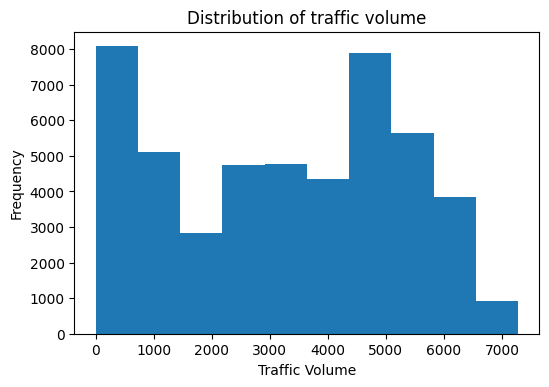

In [110]:
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.title('Distribution of traffic volume')
plt.show()

In [111]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The minimum value of the traffic value is 0 indicating no traffic, and the maximum traffic value reached is 7280. 

About 25% of the time there are about 1193 cars on the highway. This time surely reflect late hours of the night.

We can also see that 25% of the time the total number of cars on the road is about 4933 and more. This is surely during the day.

The most frequent traffic volume are in the range **0 to 1000** and **4500 to 5000**. This may be reflecting traffic during the day and night respectively.

There are few cases where traffic volume reaches values between **6500 and 7000**.

## Checking how daytime and night time influence traffic

Our previous analysis shows that there could be a potential correlation between the time of the day and traffic volume.

We will divide our dataset into two:
- Daytime: hours between 7am to 7pm (12hours in total)
- Nighttime: hours between 7 pm to 7am (12hours in total)

Though this values may not be good enough to seperate daytime from night time, it can serve as a good sarting point.


In [112]:
# Convert the date_time column to datetime object
traffic.loc[:, 'date_time'] = pd.to_datetime(traffic['date_time'])

daytime = traffic.copy()[ traffic['date_time'].dt.hour.between(7, 18, inclusive='both')]

nighttime = traffic.copy()[ (traffic['date_time'].dt.hour.between(19, 24, inclusive='both')) | (traffic['date_time'].dt.hour.between(0, 6, inclusive='both')) ]


In [113]:
nighttime.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361


## Comparing traffic during night and day

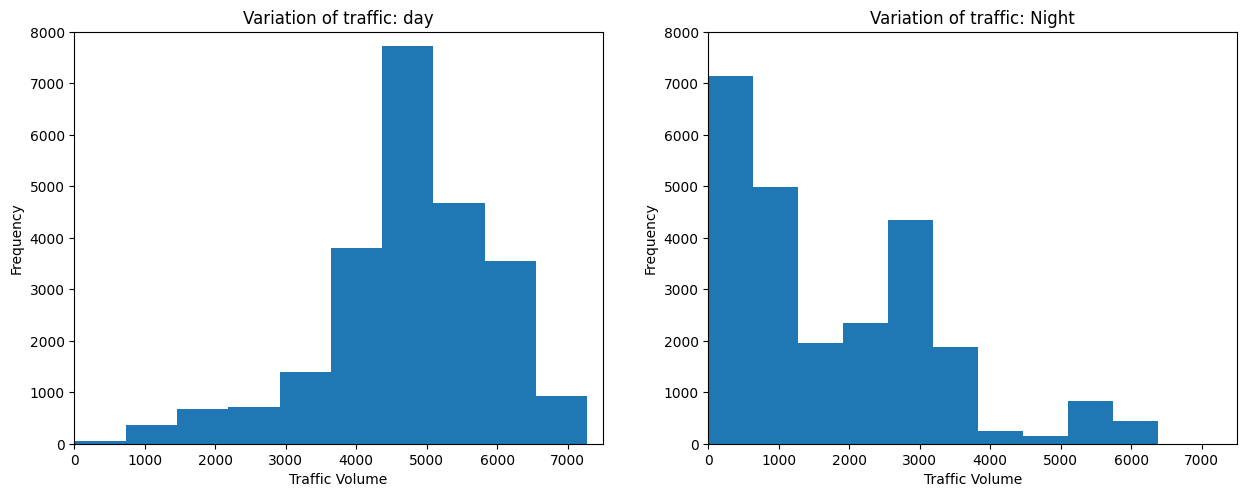

In [114]:
# Function to plot graphs on a grid

plt.figure(figsize=(15, 12))

# Day
plt.subplot(2, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.title('Variation of traffic: day')
plt.ylim([0, 8000])
plt.xlim(0, 7500)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

#Night

plt.subplot(2, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.title('Variation of traffic: Night')
plt.ylim([0, 8000])
plt.xlim(0, 7500)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()


    

In [115]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [116]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that displays the information of traffic distribution during the day is left skewed. 
This shows that the majority of the traffic volumes are high. 
75% of the time There are about 4000 to 7250 cars on the road each hour. 


The histogram showing the distribution of traffic volume at night is right skewed. This indicates that most of the traffic volumes are low at night. 75% of the time the traffic volume is 2819 or less

Since the traffic is light at night, and the aim of this analysis is to find indicators of heavy traffic, we can get rid of all the data collected at night. 

Henceforth we will continue working with daytime data.

## Understanding how time affects traffic

Time is an indicator that may affect traffic since people find themselve outside at different times for different reasons.

We will look at the variation of traffic in three different time frames:
- Monthly
- Weekly
- and Hourly

### Let's create a month column

In [119]:
daytime['month'] = daytime['date_time'].dt.month
# Grouping the dataset by month with the mean as an aggregate function
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

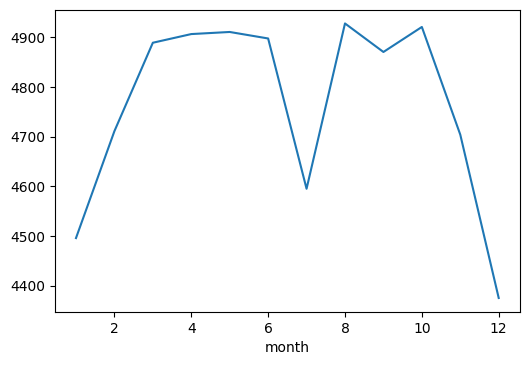

In [125]:
by_month['traffic_volume'].plot.line()
plt.show()

We can observe heavy traffic from March to October. This may be due to the warm weather that encourages activities.

The traffic is less heavy from November to February which may be due to the cold in these months.

There is an exception with the first case though, we observe a suden decrease in traffic in the month of July.



## Variation of traffic by week

In [129]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

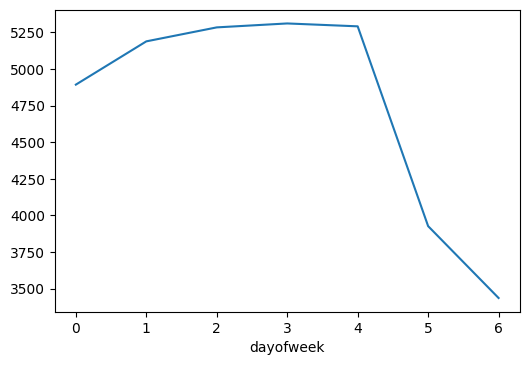

In [131]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

We can observe heavy traffic volume on business days (Monday to Friday) which is due to high activity of people.

The traffic volume is low on Saturday and even lower on Sunday. 

## Variation of traffic during hours of the day

In [134]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


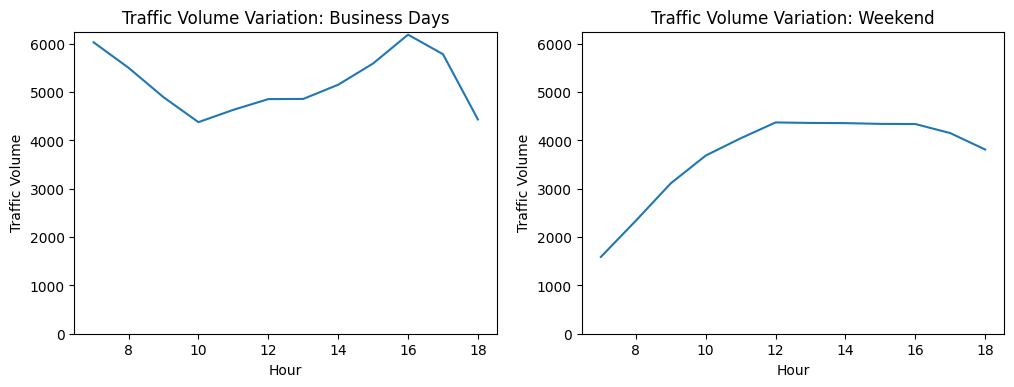

In [143]:
plt.figure(figsize=(12, 4))
# Business day plot
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume Variation: Business Days')
plt.xlabel('Hour')
plt.ylim([0, 6250])
plt.ylabel('Traffic Volume')

# Weekend Plot
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume Variation: Weekend')
plt.xlabel('Hour')
plt.ylim([0, 6250])
plt.ylabel('Traffic Volume')

plt.show()

During Business days, traffic is heaviest at 7am, 4pm and 5pm. This is the time at which people go and return from work respectively.

On the other hand, during Weekends traffic is less from 7am to 9am.

Overall, at any given time traffic is always highest during the weekends than during business days.

### Summary of finding so far

To sum up, Traffic are heavier:
1. During cold months compared to cold months
2. During Business days
3. Between 7am and 4pm on Business days

# Working with weather indicators


Another indicator that influences traffic is weather. Our dataset contains the following weather related columns: 
- temp
- rain_1h
- snow_1h
- clouds_all
- weather_main
- weather_description

Some of these columns are numerical. Let us check their correlation value with traffic volume.

In [147]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The correlation between the weather indicators and the traffic volume is very week. The temp column shows the strongest correlation  with a value of 0.13

let's visualize the relationship between temp and traffic volume.

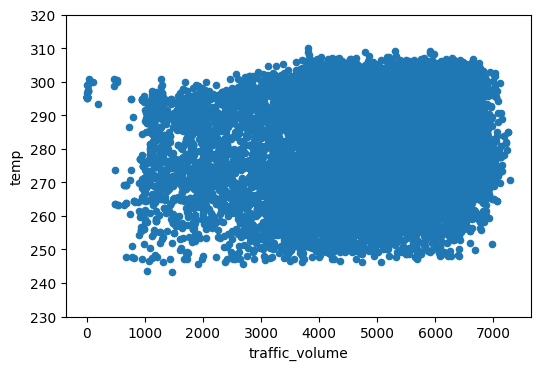

In [163]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)
plt.show()

Let's look next at the categorical weather related columns to see if we can get useful insight. There are two of these columns: weather_main and weather_description

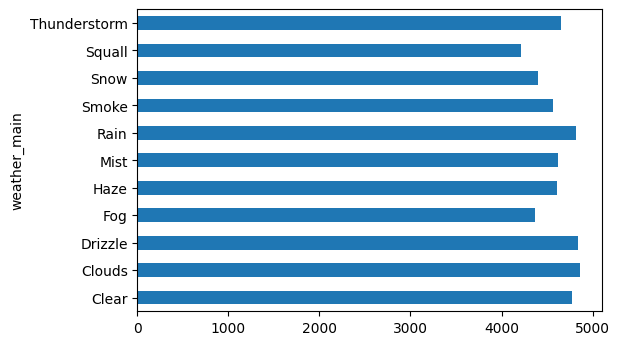

In [160]:
# Grouping the data by weather_main and weather_description

by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

# Traffic Volume vs Weather main
by_weather_main['traffic_volume'].plot.barh()
plt.show()


There is no weather type whose traffic volume exceeds 5000 cars, we can't therefore conclude that any of them is a strong traffic indicator.

Let's look at the weather_description distribution.

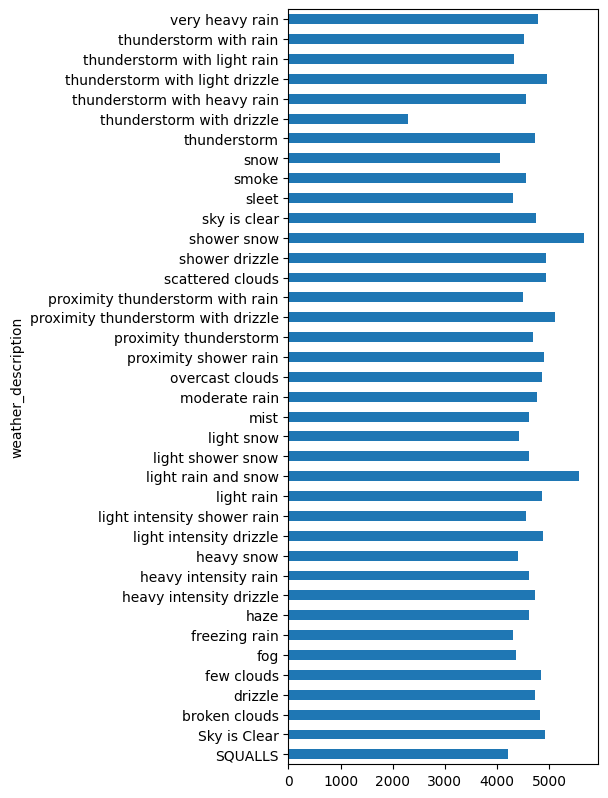

In [161]:
# Traffic Volume vs Weather description
by_weather_description['traffic_volume'].plot.barh(figsize=(4, 10))
plt.show()

The traffic volume exceeds 5000 cars when the weather condition match the description of **shower snow, Proximity thunderstorm with drizzle, and light rain and show**. 
This means that these weather conditions are indicators of heavy traffic.

# Conclusion

In this project, we tried to analyze I-94 highway traffic dataset to find the main indicators of heavy traffic.

At the end of the analysis, we find out that there are two major types of heavy traffic indicators: Time indicators and weather indicators

1. Time Indicators: 
- 7am to 4pm on business days
- Warm months (March to October) compared to cold months (November to February)
- Business days

2. Weather Indicators:
- Shower snow
- light rainfall and snow
- Proximity thunderstorm with drizzle